In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

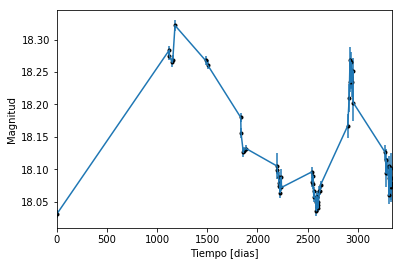

In [2]:
data = np.genfromtxt('LC_23309_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

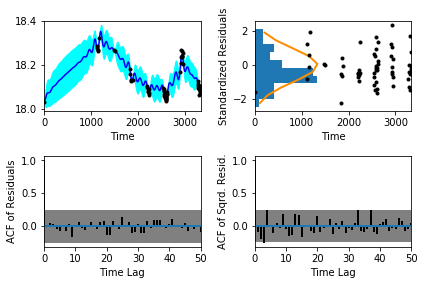

In [5]:
sample.assess_fit()

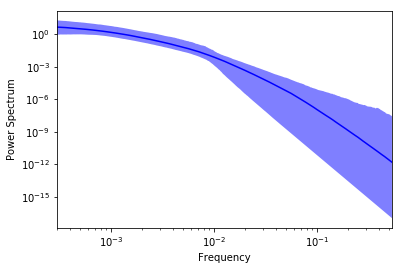

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.0119725,'Medida del nivel de ruido')

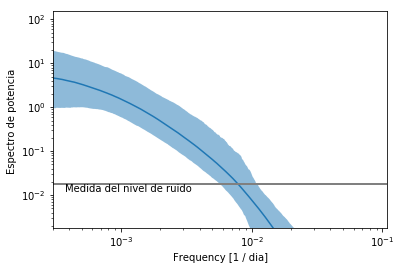

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

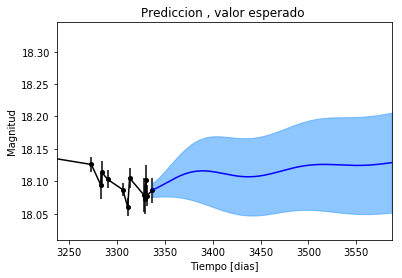

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

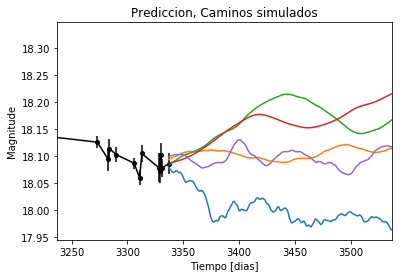

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


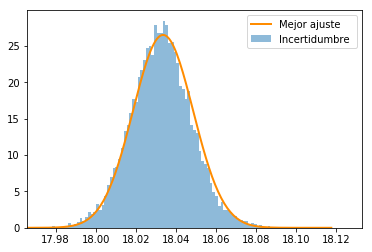

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

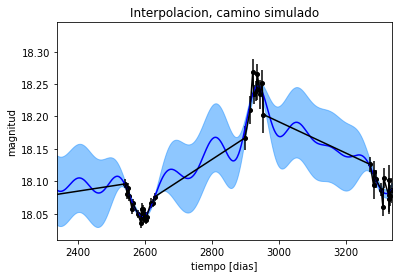

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

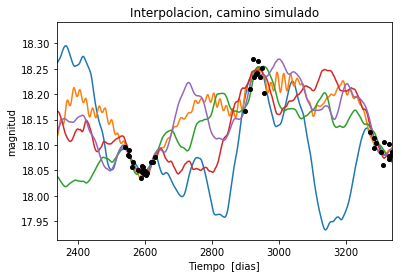

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 998.757052018
Median: 0.0125418209207
Standard deviation: 0.207408969838
68% credibility interval: [ 0.00141073  0.22188468]
95% credibility interval: [  3.87803519e-04   7.95789797e-01]
99% credibility interval: [  3.18642909e-04   1.02341574e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 686.738509593
Median: 0.00242205821936
Standard deviation: 0.0715827243407
68% credibility interval: [ 0.00049686  0.01734073]
95% credibility interval: [ 0.00032197  0.20403242]
99% credibility interval: [  3.04811755e-04   5.60973526e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 572.389409828
Median: 0.0200673847171
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1002.38118303
Median: 185.156662219
Standard deviation: 1.82763730262
68% credibility interval: [ 183.16176113  186.48819444]
95% credibility interval: [ 180.27988492  187.40751291]
99% credibility interval: [ 178.2801218   187.99287199]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 849.069702196
Median: 0.72487881654
Standard deviation: 2.09777851165
68% credibility interval: [ 0.08246401  3.77682108]
95% credibility interval: [ 0.02457723  6.89865937]
99% credibility interval: [ 0.01392379  9.91040355]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 546.052956626
Median: 0.298915022099
Standard deviation: 8.4066234911
68% credibility interval: [ 0.00984623  6.02256084]
95% credibility interval: [  2.47914218e-03 

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 332.927749165
Median: 4.33759398129e-39
Standard deviation: 2.18078909467e+28
68% credibility interval: [  6.93120802e-72   1.25285560e-07]
95% credibility interval: [  1.45773214e-101   1.12290030e+021]
99% credibility interval: [  1.56272576e-117   4.50808530e+028]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1588.05170673
Median: 18.1568287039
Standard deviation: 0.0527735027996
68% credibility interval: [ 18.1079921   18.20044249]
95% credibility interval: [ 18.04419701  18.26001267]
99% credibility interval: [ 17.9827024   18.30652223]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 275.484524652
Median: 0.00509649358553
Standard deviation: 0.238783089347
68% credibility interval: [ 0.          0.27347618]
95% credibility interval: [ 0.          0.87675714]
99% credibility interval: [ 0.          1.03835843]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 275.484524652
Median: 0.00509649358553
Standard deviation: 0.238783089347
68% credibility interval: [ 0.          0.27347618]
95% credibility interval: [ 0.          0.87675714]
99% credibility interval: [ 0.          1.03835843]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 812.484786094
Median: 0.0
Standard deviation: 0.000376077842548
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1002.38118303
Median: 185.156662219
Standard deviation: 1.82763730262
68% credibility interval: [ 183.16176113  186.48819444]
95% credibility interval: [ 180.27988492  187.40751291]
99% credibility interval: [ 178.2801218   187.99287199]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1417.13429016
Median: 0.0107802932566
Standard deviation: 0.00963127874646
68% credibility interval: [ 0.00684706  0.01971201]
95% credibility interval: [ 0.00472394  0.03775006]
99% credibility interval: [ 0.00386341  0.06568734]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1231.7407274
Median: 0.970558170032
Standard deviation: 0.15845411371
68% credibility interval: [ 0.83577623  1.14324723]
95% credibility interval: [ 0.72808387  1.34002753]
99% credibility interval: [ 0.66629195  1.48793434]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 627.205365202
Median: 0.000112835210703
Standard deviation: 0.00684674686004
68% credibility interval: [  1.28998350e-06   2.71078894e-03]
95% credibility interval: [  1.76232323e-25   1.75567430e-02]
99% credibility interval: [  1.64594027e-32   4.02875711e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 998.757052018
Median: (-0.0788025849339-0.0192197244342j)
Standard deviation: 1.98727372188
68% credibility interval: [-1.39414259-6.00032299j -0.00886387-0.07874792j]
95% credibility interval: [ -5.00009476e+00+0.j          -2.43664137e-03-5.52943804j]
99% credibility interval: [ -6.43031073e+00+0.j          -2.00209244e-03-0.09833479j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 686.738509593
Median: (-0.015218240617+0.0347080836769j)
Standard deviation: 1.56628417627
68% credibility interval: [-0.10895502+0.63779643j -0.00312188+0.05395721j]
95% credibility interval: [-1.28197350+1.52610232j -0.00202297+0.89706847j]
99% credibility interval: [ -3.52470062e+00+2.62936498j  -1.91518874e-03+0.j        ]
Posterior s